## *Modelling ancient areas for date palms (Phoenix species, Arecaceae): Bayesian analysis of biological and cultural evidence*

Bayesian Inference from conditionally independent binary features.

In [1]:
%matplotlib inline

# local en ventana independiente:
# %matplotlib tk

import pandas as pd
import numpy as np
from collections import Counter

In [2]:
cases = dict()

def add_case(ident):
    cases[ident] = (df, names, evi_index, evi_short,
                    longitude_column, latitude_column, time_column, target_column,
                    evidence_sets, setnames, colors)

We first read the input data and show the available columns:

### Case 1

In [3]:
# !wget http://robot.inf.um.es/material/data/evidence_data.csv

In [4]:
#df = pd.read_csv('http://robot.inf.um.es/material/data/evidence_data.csv',sep=';')
df = pd.read_csv('evidence_data.csv',sep=';',decimal=',')
names = dict(enumerate(df.columns))
names

{0: 'Mints and references',
 1: 'Present day locality',
 2: 'Palm-tree evidence period barycenter',
 3: 'Palm-tree evidence period',
 4: 'Palm groves',
 5: 'Coinages',
 6: 'Date remains',
 7: 'Inflorescence',
 8: 'Leaves',
 9: 'Stems and charcoal',
 10: 'Pollen',
 11: 'Phytoliths',
 12: 'Texts',
 13: 'Pottery',
 14: 'Wood paintings, papyri and scrolls',
 15: 'Jewelry, gold cups and seals',
 16: 'Rock and Wall painting and mosaic',
 17: 'Sculpture (stone, bronze and wood)',
 18: 'References',
 19: 'Taxa',
 20: 'Latitude',
 21: 'Long Deg',
 22: 'Long Min',
 23: 'Long Seg',
 24: 'Longitude',
 25: 'Altitude',
 26: 'a10'}

We first give shorter names to the evidence columns, and indicate the columns containing:

- The target (golden rule) attribute
- location and time
- evidences, grouped in sets

In [5]:
evi_index = [ 5,    6,    7,     8,     9,    10,    11,    12,   13,    14,   15,   16,   17]
evi_short = "coin datRe inflor leave stemCh pollen phytol texts potter paint jewel rockP sculpt".split()

longitude_column = 24
latitude_column  = 20
time_column      = 3
target_column    = 4

evidence_sets = [ [6,7,8,9,10,11]
                , [12,5,13,14,15,16,17]
                ]

setnames = ['palms today', 'biological', 'cultural']
colors   = ['green','red','blue']


add_case('1')

### Case 2

In [6]:
df = pd.read_csv('New Bayes CSV Expanded.csv',sep=';', encoding='latin1')
names = dict(enumerate(df.columns))
names

{0: 'Mints and references',
 1: 'Present day locality',
 2: 'Palm-tree evidence period barycenter',
 3: 'Palm-tree evidence period',
 4: 'Palm groves',
 5: 'Phoenicites - Fruits and seeds',
 6: 'Phoenicites - Inflorescence',
 7: 'Phoenicites - Leaves',
 8: 'Phoenicites - Stems and charcoal',
 9: 'Phoenicites - Roots',
 10: 'Phoenicites - Pollen',
 11: 'Phoenicites - Phytoliths',
 12: 'Fruits and seeds',
 13: 'Inflorescence',
 14: 'Leaves',
 15: 'Stems and charcoal',
 16: 'Pollen',
 17: 'Phytoliths',
 18: 'Texts and maps',
 19: 'Coinages',
 20: 'Pottery',
 21: 'Basketry',
 22: 'Wood paintings, papyri and scrolls',
 23: 'Jewelry, gold cups and seals',
 24: 'Rock and Wall painting and mosaic',
 25: 'Sculpture (stone, bronze and wood)',
 26: 'References',
 27: 'Taxa',
 28: 'Latitude',
 29: 'Longitude'}

In [7]:
evi_index = [   5,       6,        7,      8,     9,       10,       11,    12,   13,    14,  15,   16,     17,      18,  19, 20,   21,   22,   23 ,  24,    25]
evi_short = "Ps_fruit Ps_flower Ps_leaf Ps_stem Ps_root Ps_pollen Ps_liths Fruit Flower Leaf Stem Pollen Phytoliths Text Coin Pot Basket Paint Jewel Wall Sculpture".split()


longitude_column = 29
latitude_column  = 28
time_column      = 3
target_column    = 4

evidence_sets = [ [5,6,7,8,9,10,11]
                , [12,13,14,15,16,17]
                , [18,19,20,21,22,23,24,25]
                ]

setnames = ['Golden Rule', 'Fossils', 'Biological', 'Cultural']
colors   = ['green','orange','red','blue']


add_case('2')

### Case 3

In [8]:
df = pd.read_csv('New_Bayes_CSV2.csv',sep=';', decimal=',', encoding='latin1')
names = dict(enumerate(df.columns))
names

{0: 'Mints and references',
 1: 'Present day locality',
 2: 'Palm-tree evidence period barycenter',
 3: 'Chronoref',
 4: 'Palm groves',
 5: 'Coinages',
 6: 'Date remains',
 7: 'Inflorescence',
 8: 'Leaves',
 9: 'Stems and charcoal',
 10: 'Pollen',
 11: 'Phytoliths',
 12: 'Texts and maps',
 13: 'Pottery',
 14: 'Wood paintings, papyri and scrolls',
 15: 'Jewelry, gold cups and seals',
 16: 'Rock and Wall painting and mosaic',
 17: 'Sculpture (stone, bronze and wood)',
 18: 'References',
 19: 'Taxa',
 20: 'Latitude',
 21: 'Longitude',
 22: 'Altitude',
 23: 'a10'}

In [9]:
evi_index = [ 5,    6,    7,     8,     9,    10,    11,    12,   13,    14,   15,   16,   17]
evi_short = "coin datRe inflor leave stemCh pollen phytol texts potter paint jewel rockP sculpt".split()

longitude_column = 21
latitude_column  = 20
time_column      = 3
target_column    = 4

evidence_sets = [ [6,7,8,9,10,11]
                , [12,5,13,14,15,16,17]
                ]

setnames = ['palms today', 'biological', 'cultural']
colors   = ['green','red','blue']


add_case('3')

### Case 4

In [10]:
df = pd.read_csv('New_Bayes_CSVExpanded.csv',sep=';', encoding='latin1')
names = dict(enumerate(df.columns))
names

{0: 'Mints and references',
 1: 'Present day locality',
 2: 'Period barycenter',
 3: 'Chronoref',
 4: 'Palm groves',
 5: 'Phoenicites - Fruits and seeds',
 6: 'Phoenicites - Inflorescence',
 7: 'Phoenicites - Leaves',
 8: 'Phoenicites - Stems and charcoal',
 9: 'Phoenicites - Roots',
 10: 'Phoenicites - Pollen',
 11: 'Phoenicites - Phytoliths',
 12: 'Fruits and seeds',
 13: 'Inflorescence',
 14: 'Leaves',
 15: 'Stems and charcoal',
 16: 'Pollen',
 17: 'Phytoliths',
 18: 'Texts and maps',
 19: 'Coinages',
 20: 'Pottery',
 21: 'Basketry',
 22: 'Wood paintings, papyri and scrolls',
 23: 'Jewelry, gold cups and seals',
 24: 'Rock and Wall painting and mosaic',
 25: 'Sculpture (stone, bronze and wood)',
 26: 'References',
 27: 'Taxa',
 28: 'Latitude',
 29: 'Longitude'}

In [11]:
evi_index = [   5,       6,        7,      8,     9,       10,       11,    12,   13,    14,  15,   16,     17,      18,  19, 20,   21,   22,   23 ,  24,    25]
evi_short = "Ps_fruit Ps_flower Ps_leaf Ps_stem Ps_root Ps_pollen Ps_liths Fruit Flower Leaf Stem Pollen Phytoliths Text Coin Pot Basket Paint Jewel Wall Sculpture".split()


longitude_column = 29
latitude_column  = 28
time_column      = 3
target_column    = 4

evidence_sets = [ [5,6,7,8,9,10,11]
                , [12,13,14,15,16,17]
                , [18,19,20,21,22,23,24,25]
                ]

setnames = ['Golden Rule', 'Fossils', 'Biological', 'Cultural']
colors   = ['green','orange','red','blue']


add_case('4')

### Data inspection

Choose a case for the analysis.

In [12]:
database = '4'

# get the stored configuration and prepare some variables

(df, names, evi_index, evi_short,
 longitude_column, latitude_column, time_column, target_column,
 evidence_sets, setnames, colors) = cases[database]

short_names = names.copy()
for k, n in zip(evi_index, evi_short):
    short_names[k] = n

sets = [[target_column]] + evidence_sets

Check that the column types are correct:

In [13]:
evtime = np.array(df[names[time_column]])
if evtime.dtype != int:
    print(f'WARNING!: the time column {time_column} ({names[time_column]}) must be integer')
    for k,v in enumerate(evtime):
        try:
            if int(v) != int(v):
                print(f'row {k} has unexpected value {v} in column {names[time_column]}')
        except:
            print(f'row {k} has unexpected value {v} in column {names[time_column]}')
else:
    print('ok times')

ok times


In [14]:
evlong = np.array(df[names[longitude_column]])
if evlong.dtype != float:
    print(f'WARNING!: the longitude column {longitude_column} ({names[longitude_column]}) must be float')
    print(evlong.dtype)
    for k,v in enumerate(evlong):
        try:
            if float(v) != float(v):
                print(f'row {k} has unexpected value {v} in column {names[longitude_column]}')
        except:
            print(f'row {k} has unexpected value {v}  in column {names[longitude_column]}')
elif np.isnan(evlong).any():
    for k,v in enumerate(evlong):
        if np.isnan(v):
            print(f'row {k} has unexpected value {v} in column {names[longitude_column]}')
else:
    print('ok longitude')
                  

row 71 has unexpected value nan in column Longitude
row 72 has unexpected value nan in column Longitude


In [15]:
evlat = np.array(df[names[latitude_column]])
if evlat.dtype != float:
    print(f'WARNING!: the latitude column {latitude_column} ({names[latitude_column]}) must be float')
    print(evlat.dtype)
    for k,v in enumerate(evlat):
        try:
            if float(v) != float(v):
                print(f'row {k} has unexpected value {v} in column {names[latitude_column]}')
        except:
            print(f'row {k} has unexpected value {v} in column {names[latitude_column]}')
elif np.isnan(evlat).any():
    for k,v in enumerate(evlat):
        if np.isnan(v):
            print(f'row {k} has unexpected value {v} in column {names[latitude_column]}')
else:
    print('ok latitude')
                  

row 71 has unexpected value nan in column Latitude
row 72 has unexpected value nan in column Latitude


Show the first record:

In [16]:
df.loc[0]

Mints and references                                                 Bhisi, Maharashtra
Present day locality                  Late Cretaceous palm stem Palmoxylon lametaei ...
Period barycenter                                                  c. 65 million yr. BC
Chronoref                                                                     -65000000
Palm groves                                                                           0
Phoenicites - Fruits and seeds                                                        0
Phoenicites - Inflorescence                                                           0
Phoenicites - Leaves                                                                  0
Phoenicites - Stems and charcoal                                                      1
Phoenicites - Roots                                                                   0
Phoenicites - Pollen                                                                  0
Phoenicites - Phytoliths        

Palm types:

In [17]:
print(set(df['Taxa']))
phoenix = np.where(np.array(df['Taxa'])=='Phoenix')
phoenix

{'P rupicola', 'Ps danteana', 'P abyssinica', 'P canariensis', 'Ps monodi', 'P arabica', 'Ps aschersonii', 'Ps occidentalis', 'P sylvestris', 'Ps ornatum', 'Ps. sp.', 'Ps dindoriensis pp.', 'P reclinata', 'P iberica', 'P hanceana', 'Ps zeelanica', 'Ps raoi', 'Ps indica', 'Ps intertrappea', 'Ps phoenicoides', 'Ps bohemica', 'P theophrasti', 'P pusilla', 'Ps pallavicini', 'Ps lakhanpalii', 'P atlantica', 'P paludosa', 'Ps areolatus', 'Ps logudorense', 'Ps jungii', 'Ps angustifolius', 'P roebelenii', 'Ps coryphoides', 'Ps windmillis', 'P acaulis', 'P caespitosa', 'Ps pseudosylvestris', 'Ps lametaei', 'Ps pumila', 'P loureiroi', 'Ps ovale', 'Ps salicifolius', 'Ps borealis', 'Ps spectabilis', 'P dactylifera', 'P windmillis', 'Ps hercynica'}


(array([], dtype=int64),)

In [18]:
palm_type = set(df.Taxa[df["Palm groves"]==1])
palm_type

{'P abyssinica',
 'P acaulis',
 'P arabica',
 'P atlantica',
 'P caespitosa',
 'P canariensis',
 'P dactylifera',
 'P hanceana',
 'P iberica',
 'P loureiroi',
 'P paludosa',
 'P pusilla',
 'P reclinata',
 'P roebelenii',
 'P rupicola',
 'P sylvestris',
 'P theophrasti'}

### Data analysis

Features of interest in this study:

In [19]:
features = [short_names[k] for k in sum(sets,[])]
features

['Palm groves',
 'Ps_fruit',
 'Ps_flower',
 'Ps_leaf',
 'Ps_stem',
 'Ps_root',
 'Ps_pollen',
 'Ps_liths',
 'Fruit',
 'Flower',
 'Leaf',
 'Stem',
 'Pollen',
 'Phytoliths',
 'Text',
 'Coin',
 'Pot',
 'Basket',
 'Paint',
 'Jewel',
 'Wall',
 'Sculpture']

In [20]:
bindf = df[df.columns[sum(sets,[])]]
bindf[:10]

,Palm groves,Phoenicites - Fruits and seeds,Phoenicites - Inflorescence,Phoenicites - Leaves,Phoenicites - Stems and charcoal,Phoenicites - Roots,Phoenicites - Pollen,Phoenicites - Phytoliths,Fruits and seeds,Inflorescence,...,Pollen,Phytoliths,Texts and maps,Coinages,Pottery,Basketry,"Wood paintings, papyri and scrolls","Jewelry, gold cups and seals",Rock and Wall painting and mosaic,"Sculpture (stone, bronze and wood)"
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extraction of features as a numpy array:

In [21]:
bindataraw = np.array(bindf)
bindataraw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Check that all records have a single type of evidence.

In [22]:
Counter(bindataraw.sum(axis=1))

Counter({1: 3529})

Get geographic location of each item.

In [23]:
locationraw = df[[names[longitude_column],names[latitude_column]]]

locationraw[:10]

,Longitude,Latitude
0,79.399722,20.631944
1,79.983333,22.666667
2,79.583889,20.355556
3,80.816667,23.516667
4,80.816667,23.516667
5,1.344722,36.167778
6,-0.131944,51.504444
7,-0.131944,51.504444
8,-0.131944,51.504444
9,118.400000,36.400000


In [24]:
locationraw.dtypes

Longitude    float64
Latitude     float64
dtype: object

Check that the types of Longitude and Latitude are float64 and if necessary change the decimal separator in the `pd.read_csv` function above. 

Extract times of evidences:

In [25]:
evtime = np.array(df[names[time_column]])

In [26]:
if evtime.dtype != int:
    print(f"Please make sure that the times in column {names[time_column]} are simple integers!")
    np.where(evtime=='500 BC') # fix dataset
    evtime[613] = '-500'
    evtime[evtime=='?'] = '0'  # year zero = unknown
    evtime = evtime.astype(int)

Check the dates that appear in the dataset (without repetitions):

In [27]:
print(sorted(list(set(evtime))))
print(min(evtime), max(evtime))

[-65000000, -60000000, -55000000, -50000000, -49500000, -45000000, -40000000, -37000000, -35000000, -34000000, -30000000, -29000000, -28000000, -25500000, -25000000, -23000000, -21500000, -20000000, -19800000, -18000000, -17900000, -17800000, -14000000, -12000000, -10000000, -6000000, -5000000, -4000000, -3900000, -3600000, -2680000, -2600000, -1785000, -63000, -53000, -51400, -48000, -45000, -44000, -40000, -37000, -35000, -14000, -11500, -10000, -8700, -8400, -8000, -7800, -7700, -7600, -7200, -7050, -7000, -6800, -6650, -6500, -6300, -6200, -6000, -5530, -5500, -5400, -5324, -5282, -5050, -5000, -4600, -4530, -4500, -4400, -4200, -4050, -4000, -3800, -3700, -3600, -3500, -3450, -3400, -3300, -3200, -3100, -3050, -3000, -2950, -2850, -2800, -2700, -2600, -2509, -2500, -2400, -2350, -2334, -2300, -2250, -2200, -2149, -2112, -2100, -2050, -2000, -1980, -1925, -1900, -1890, -1870, -1850, -1840, -1830, -1800, -1790, -1770, -1750, -1700, -1650, -1630, -1600, -1580, -1575, -1550, -1500, -1

Select records with any of the desired evidences in the selected time interval.

In [28]:
#tmin = 0
tmin = min(evtime)-1
tmax = 2020

tmingr = min(evtime)-1
tmaxgr = max(evtime)+1
#tmaxgr = 100


lon_ok, lat_ok = ~ np.isnan(np.array(locationraw)).T

isgt = bindataraw[:,0] == 1

selected_gt  = isgt & (evtime != 0) & (evtime >= tmingr) & (evtime <= tmaxgr)
selected_evi = (~isgt) & (evtime != 0) & (evtime >= tmin) & (evtime <= tmax)
any_evi = bindataraw.sum(axis=1) == 1

selected_records = (selected_gt | selected_evi) & any_evi & lon_ok & lat_ok

bindata = bindataraw[selected_records]
location = locationraw[selected_records]

print(f'{selected_records.sum()} evidences selected')

3516 evidences selected


Extraction of features of the different types for drawing.

In [29]:
classes = [ np.array(df[df.columns[s]]).sum(axis=1)[selected_records] == True for s in sets]

Preparation of map drawing functions.

In [30]:
import cartopy
import cartopy.feature as cpf
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

lat_lon = cartopy.crs.PlateCarree()

In [31]:
def genmap(extent, figsize, grid=2):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection=cartopy.crs.Mercator())
    lon1,lon2,lat1,lat2 = extent
    
    ax.add_feature(cpf.LAND)
    ax.add_feature(cpf.OCEAN)
    ax.add_feature(cpf.COASTLINE)
    ax.add_feature(cpf.BORDERS, linestyle=':')
    ax.add_feature(cpf.LAKES,   alpha=0.5)
    ax.add_feature(cpf.RIVERS)

    if grid is not None:
        gl = ax.gridlines(crs=lat_lon, draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylocator = mticker.FixedLocator(range(lat1-grid,lat2+grid,grid))
        gl.xlocator = mticker.FixedLocator(range(lon1-grid,lon2+grid,grid))
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8, 'color': 'gray'}
        gl.ylabel_style = {'size': 12, 'color': 'gray'}

    ax.set_extent(extent,crs=lat_lon)
    return fig

Show evidences in a small region.

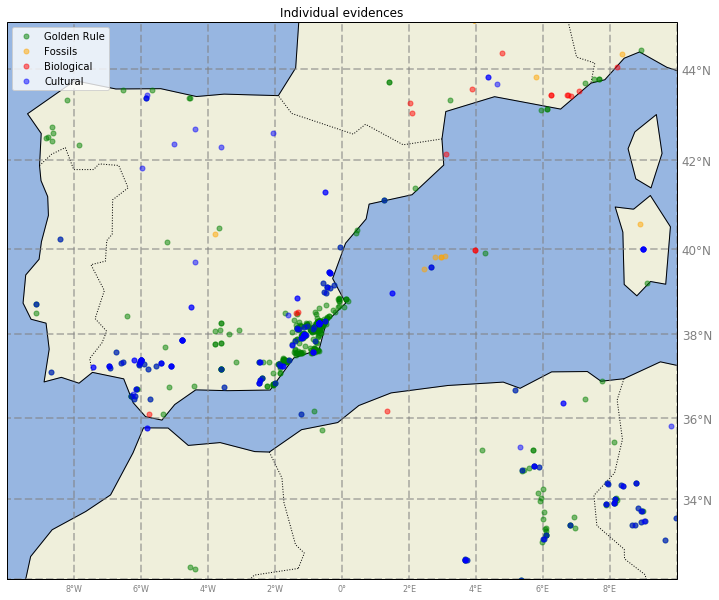

In [32]:
region = [-10, 10, 32, 45]

genmap(figsize=(12,12), extent=region)
#genmap(figsize=(18,18), extent=[-20,70,4,54], grid=None);

for sel,col, name in zip(classes, colors, setnames):
     plt.plot(*np.array(location[sel]).T, '.', color=col, markerSize=10, alpha=0.5, transform=lat_lon,label=name)    

plt.legend();
plt.title('Individual evidences');

Show complete region of study.

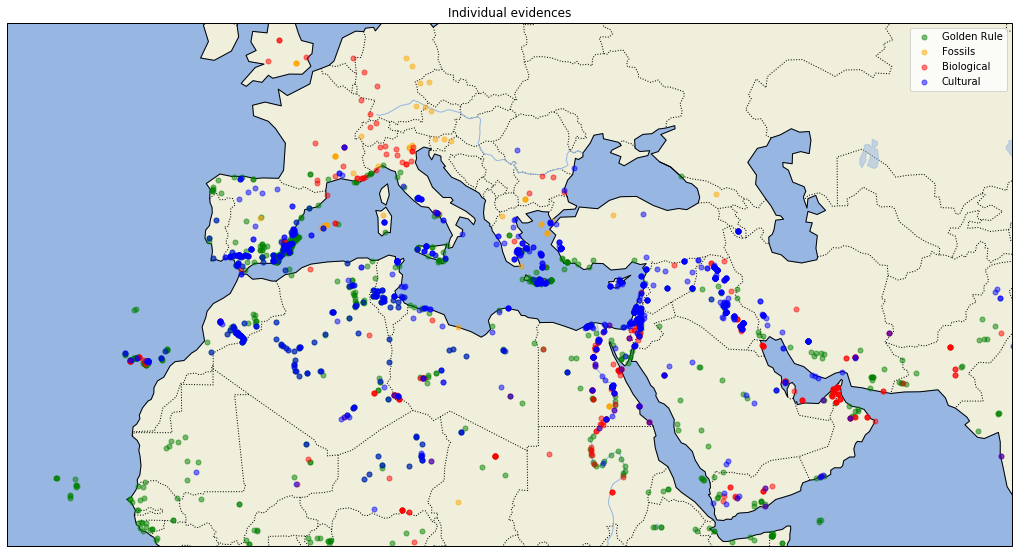

In [33]:
region = [-30,74,10,54]

genmap(figsize=(18,18), extent=region, grid=None);

for sel,col, name in zip(classes, colors, setnames):
     plt.plot(*np.array(location[sel]).T, '.', color=col, markerSize=10, alpha=0.5, transform=lat_lon,label=name)    

plt.legend();
plt.title('Individual evidences');

Show the number of evidences of the differente types.

In [34]:
np.sum(bindata,axis=0)

array([1686,   11,    8,   32,   12,    2,   13,    3,  259,    4,   99,
         49,   93,   16,  630,  206,   58,   81,   13,  135,   57,   49])

Utility function to create a grid with given size and offset.

In [35]:
def makeGrid(size=2, offset=0):
    fun = lambda x: np.floor_divide(x-offset,size).astype(int)
    x1,x2,y1,y2 = fun(np.array(region))-[0,1,0,1]
    #print(x1,x2,y1,y2)
    celllocs = np.array( location.apply(fun ))
    cells = {tuple(x) for x in celllocs}
    allcells = {(x,y) for x in range(x1,x2+1) for y in range(y1,y2+1)}
    #emptycells = allcells.difference(cells)
    #print(len(emptycells))
    celldic = { x : np.where( np.all(celllocs == x,axis=1) )[0] for x in allcells }
    data  = { x: bindata[v] for x,v in celldic.items() }
    dataN = { x: d.sum(axis=0) for x,d in data.items() }
    dataB = { x: (v>0).astype(int) for x,v in dataN.items() }
    dataP = { x: v[1:] for x,v in dataB.items() if v[0] == 1 }
    dataN = { x: v[1:] for x,v in dataB.items() if v[0] == 0 }
    S = np.array([v for _,v in dataP.items()]).mean(axis=0)
    E = np.array([1-v for _,v in dataN.items()]).mean(axis=0)
    loc = lambda x: size/2 + x*size + offset
    dataL = { x: loc(np.array(x)) for x in allcells }
    return data, dataB, dataP, dataN, dataL, S,E

Show cells with positive ground truth in the standard grid.

210 934


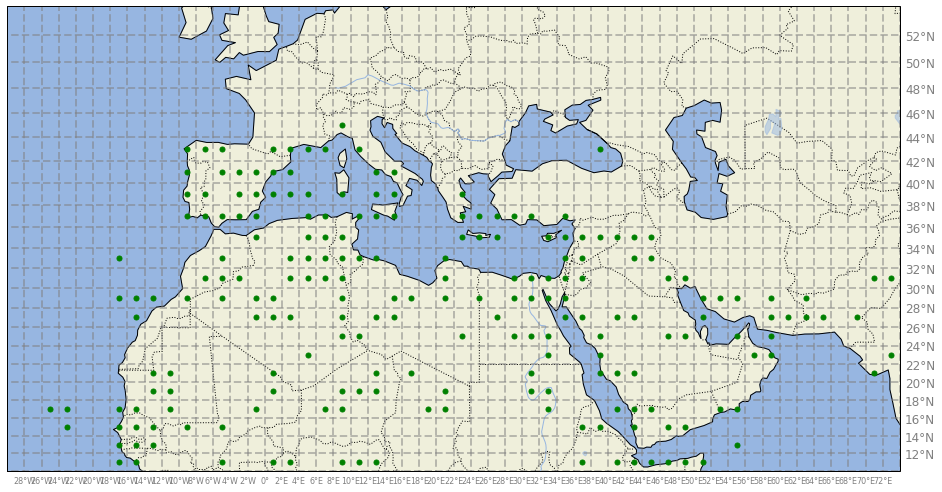

In [36]:
_, dataB, dataP, dataN, dataL, S, E = makeGrid()

print(len(dataP), len(dataN))

genmap(figsize=(16,16), extent=region)

PCells = np.array([dataL[x] for x,_ in dataP.items()])
NCells = np.array([dataL[x] for x,_ in dataN.items()])

plt.plot(*PCells.T, '.',color='green', markerSize=10, transform=lat_lon);
#plt.plot(*NCells.T, '.',color='red',   markerSize=10, transform=lat_lon);

We can compute the sensitivity ($s$) and specificity ($e$) of the features in the above grid:

In [37]:
S

array([0.0047619 , 0.        , 0.01904762, 0.0047619 , 0.        ,
       0.00952381, 0.        , 0.1952381 , 0.0047619 , 0.1047619 ,
       0.06666667, 0.04761905, 0.02857143, 0.41904762, 0.11904762,
       0.07142857, 0.0952381 , 0.02380952, 0.09047619, 0.1       ,
       0.04761905])

In [38]:
E

array([0.99464668, 1.        , 0.98929336, 0.99357602, 0.99892934,
       0.99678801, 1.        , 0.95931478, 1.        , 0.98608137,
       0.98929336, 0.99892934, 0.99785867, 0.98286938, 0.98501071,
       0.99785867, 0.99143469, 0.99785867, 0.99036403, 0.99571734,
       0.9882227 ])

Tools for creation and application of the tests.

In [39]:
def sig(z):
    return 1/(1+10**(-z/10))

def lb(p):
    return 10*np.log10(max(p,1e-20))

def llr(p):
    return lb(p) - lb(1-p)

def mkTest(s,e):
    p = lb(s)   - lb(1-e)
    n = lb(1-s) - lb(e) 
    return lambda x: p if x else n

#tests = [ mkTest(s,e) for s,e in zip(S,E) ]

Instead of a single grid, we compute the distribution of $s$ and $e$ in a set of grids with different sizes and offsets.

In [40]:
Ss,Es  = zip(* [ makeGrid( s,o)[-2:] for s in [1.5, 1.75, 2, 2.25, 2.5, 3] for o in [s*v for v in [0,0.1,0.2,0.3,0.4,0.5]]])
Ss = np.array(Ss)
Es = np.array(Es)

tests = [ mkTest(s,e) for s,e in zip(np.mean(Ss,axis=0),np.mean(Es,axis=0)) ]

Show the discrimination ability of each feature:

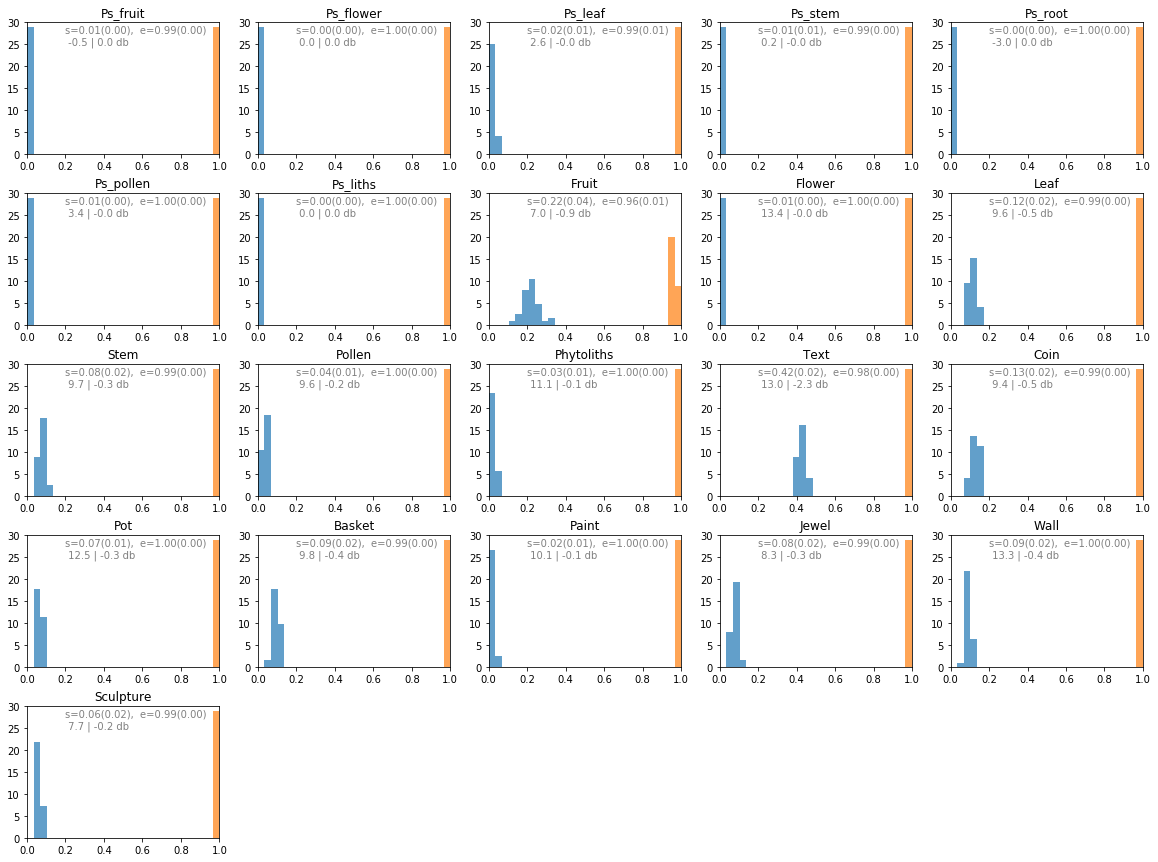

In [41]:
def showTest(test):
    bins = np.linspace(0,1,30)
    plt.hist(Ss[:,test], density=True,alpha=0.7, bins=bins);
    plt.hist(Es[:,test], density=True,alpha=0.7, bins=bins);
    testname = features[test+1]
    #plt.title('{}\n s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(testname,Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
     #         tests[test](True),tests[test](False)))
    plt.text(0.2,25,'s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
              tests[test](True),tests[test](False)),color='gray')
    plt.title(testname)
    plt.xlim(0,1); plt.ylim(0,30);

    
num_tests = len(features)-1
num_fig_rows = num_tests // 5 + (1 if num_tests % 5 > 0 else 0)
plt.figure(figsize=(20,num_fig_rows*3))
plt.subplots_adjust(hspace=0.3)
for k in range(len(tests)):
    plt.subplot(num_fig_rows,5,k+1)
    showTest(k)

And finally we apply the tests on a new grid.

[Jeffreys scale of evidence](https://en.wikipedia.org/wiki/Bayes_factor#Interpretation)

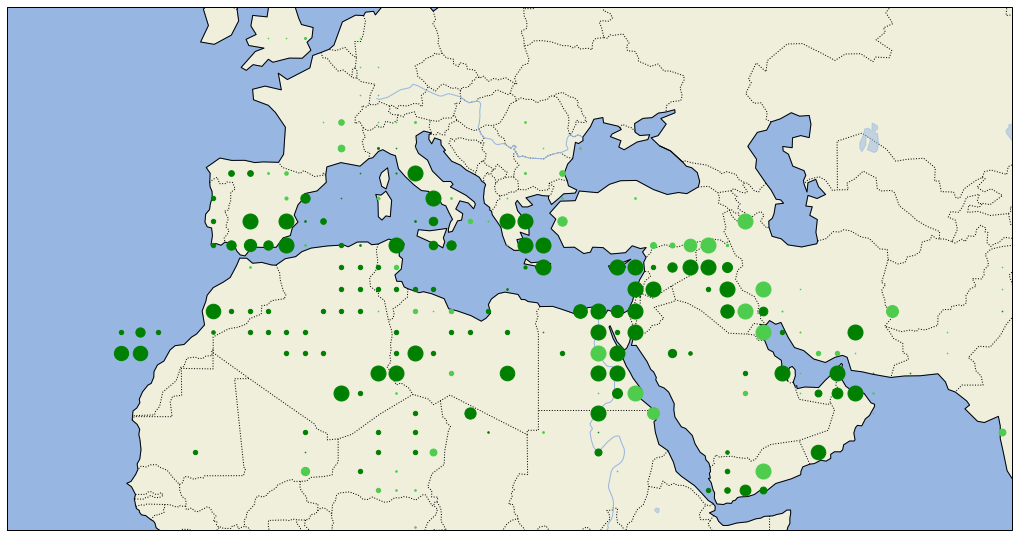

In [42]:
def colorpred(t,p):
    if t==1 and p>0.5: return 'green'
    if t==0 and p<0.5: return 'black'
    if t==0 and p>0.5: return (0.3,0.8,0.3)
    if t==1 and p<0.5: return 'gray'

    
#dataB, _, _, dataL, _, _ = makeGrid()
_, dataB, _, _, dataL, _, _ = makeGrid(size=1.9,offset=-0.15)
    
genmap(figsize=(18,18), extent=region, grid=None)
for c,v in (dataB).items():
    e = sum([t(x) for t,x in zip(tests,v[1:])])
    p = sig(e)
    col = colorpred(v[0],p)
    if e>0:
        #print(e, p)
        plt.plot(*dataL[c],'.',color=col, markerSize=min(e,30), transform=lat_lon)

Entropy

In [43]:
def info(p):
    if p==0:
        return 0
    return -p * np.log2(p)

# Shannon entropy of a cell, (ratio with respect to the maximum possible value)
def entropy(x):
    # total number of evidences of each type (discarding the ground truth initial feature)
    counts = x.sum(axis=0)[1:]
    n = counts.sum()
    if n==0:
        return 0
    
    freqs = counts/n
    
    H = [info(p) for p in freqs]
    
    mx = np.log2(len(H))
    #return t, counts, freqs, H, sum(H), sum(H)/mx
    
    return sum(H)/mx

Collect data in each cell of the grid to compute the entropy.

In [44]:
def makeGrid2(size=2, offset=0):
    fun = lambda x: np.floor_divide(x-offset,size).astype(int)
    x1,x2,y1,y2 = fun(np.array(region))-[0,1,0,1]
    #print(x1,x2,y1,y2)
    celllocs = np.array( location.apply(fun ))
    cells = {tuple(x) for x in celllocs}
    allcells = {(x,y) for x in range(x1,x2+1) for y in range(y1,y2+1)}    
    celldic = { x : np.where( np.all(celllocs == x,axis=1) )[0] for x in allcells }
    
    dataH  = { x: entropy(bindata[v]) for x,v in celldic.items() }
    
    loc = lambda x: size/2 + x*size + offset
    dataL = { x: loc(np.array(x)) for x in allcells }
    return dataH, dataL

In [45]:
dataH, dataL = makeGrid2()

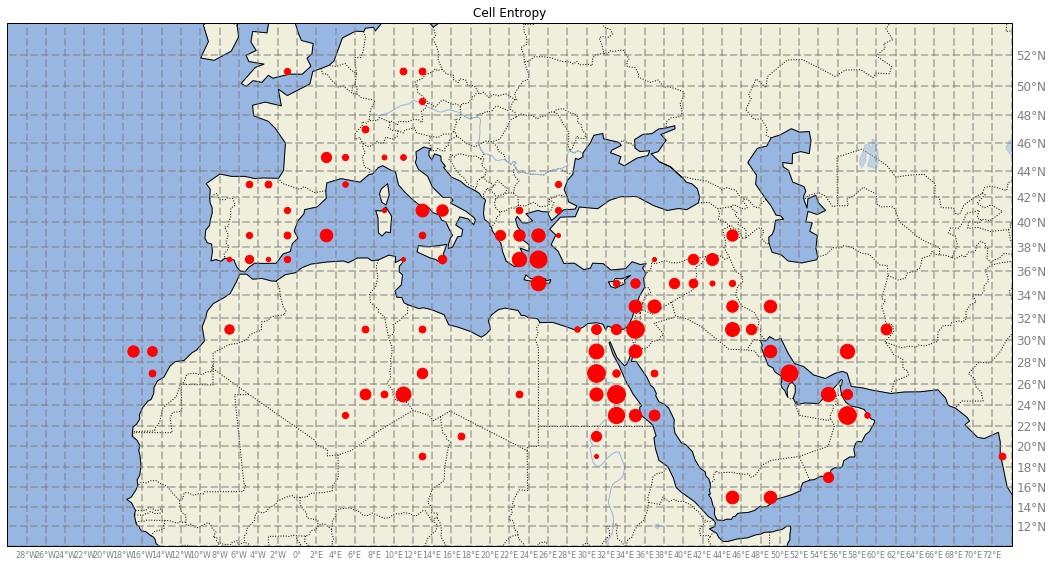

In [46]:
genmap(figsize=(18,18), extent=region, grid=2)

for c,h in (dataH).items():
    plt.plot(*dataL[c],'.',color='red', markerSize=2*30*h, transform=lat_lon)
    
plt.title('Cell Entropy');

Collect data in each cell of the grid to compute the distribution of the number of evidence items of each type.

In [47]:
def counts(x):
    c = x.sum(axis=0)
    return c

from collections import Counter


def showCounts(d):
    del d[0]
    return np.array(list(d.items()))

def makeGrid3(size=2, offset=0):
    fun = lambda x: np.floor_divide(x-offset,size).astype(int)
    x1,x2,y1,y2 = fun(np.array(region))-[0,1,0,1]
    #print(x1,x2,y1,y2)
    celllocs = np.array( location.apply(fun ))
    cells = {tuple(x) for x in celllocs}
    allcells = {(x,y) for x in range(x1,x2+1) for y in range(y1,y2+1)}    
    celldic = { x : np.where( np.all(celllocs == x,axis=1) )[0] for x in allcells }
    
    dataN  = { x: counts(bindata[v]) for x,v in celldic.items() }
    
    dist = [ Counter([c[k] for _,c in dataN.items() ]) for k in range(len(features)) ]
    
    return dist

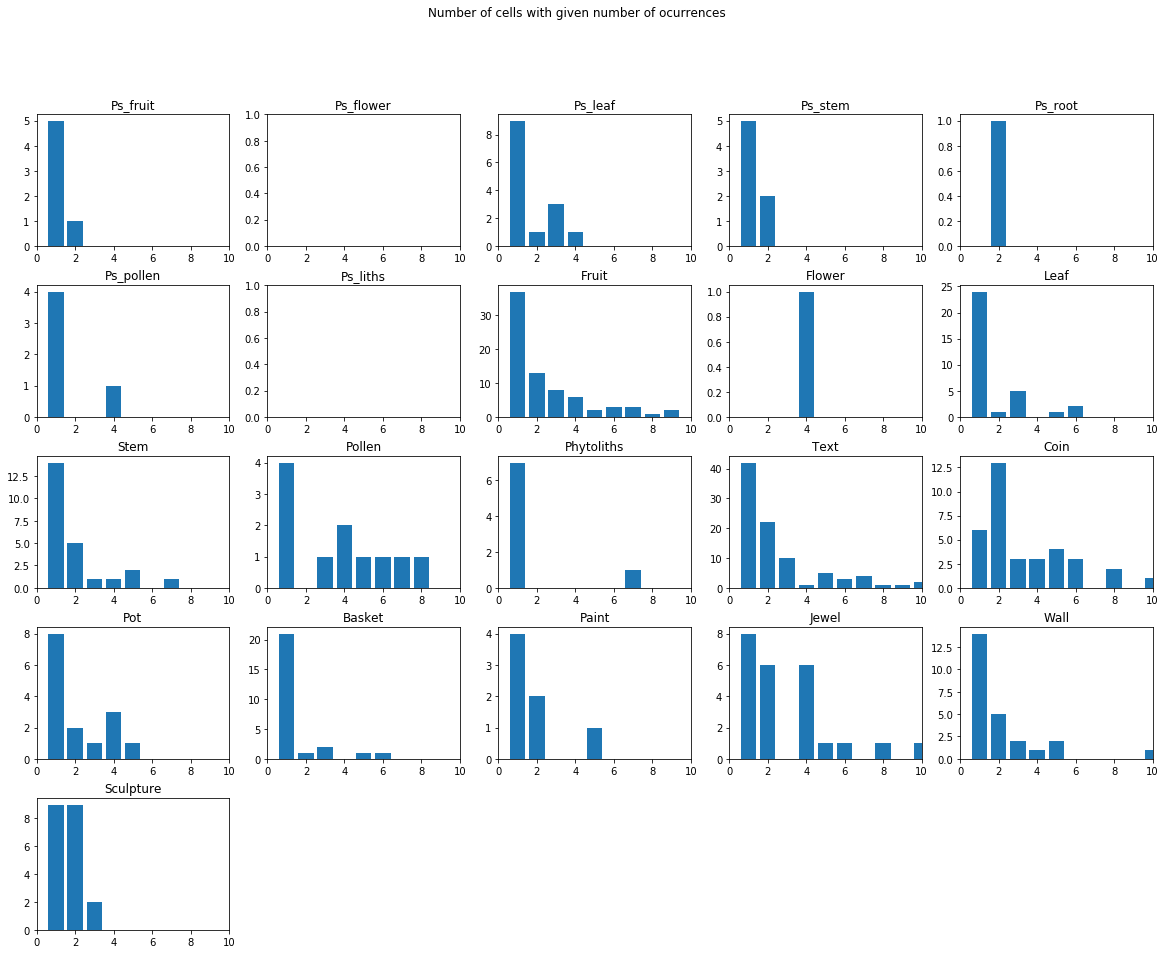

In [48]:
dist = makeGrid3()

plt.figure(figsize=(20,num_fig_rows*3))
plt.subplots_adjust(hspace=0.3)
for k in range(1, len(features)):
    plt.subplot(num_fig_rows,5,k)
    if len(dist[k])>1:
        plt.bar(*showCounts(dist[k]).T);
    plt.xlim(0,10);
    plt.title(features[k]);
plt.suptitle('Number of cells with given number of ocurrences');